# Overall Crime

KeyboardInterrupt: 

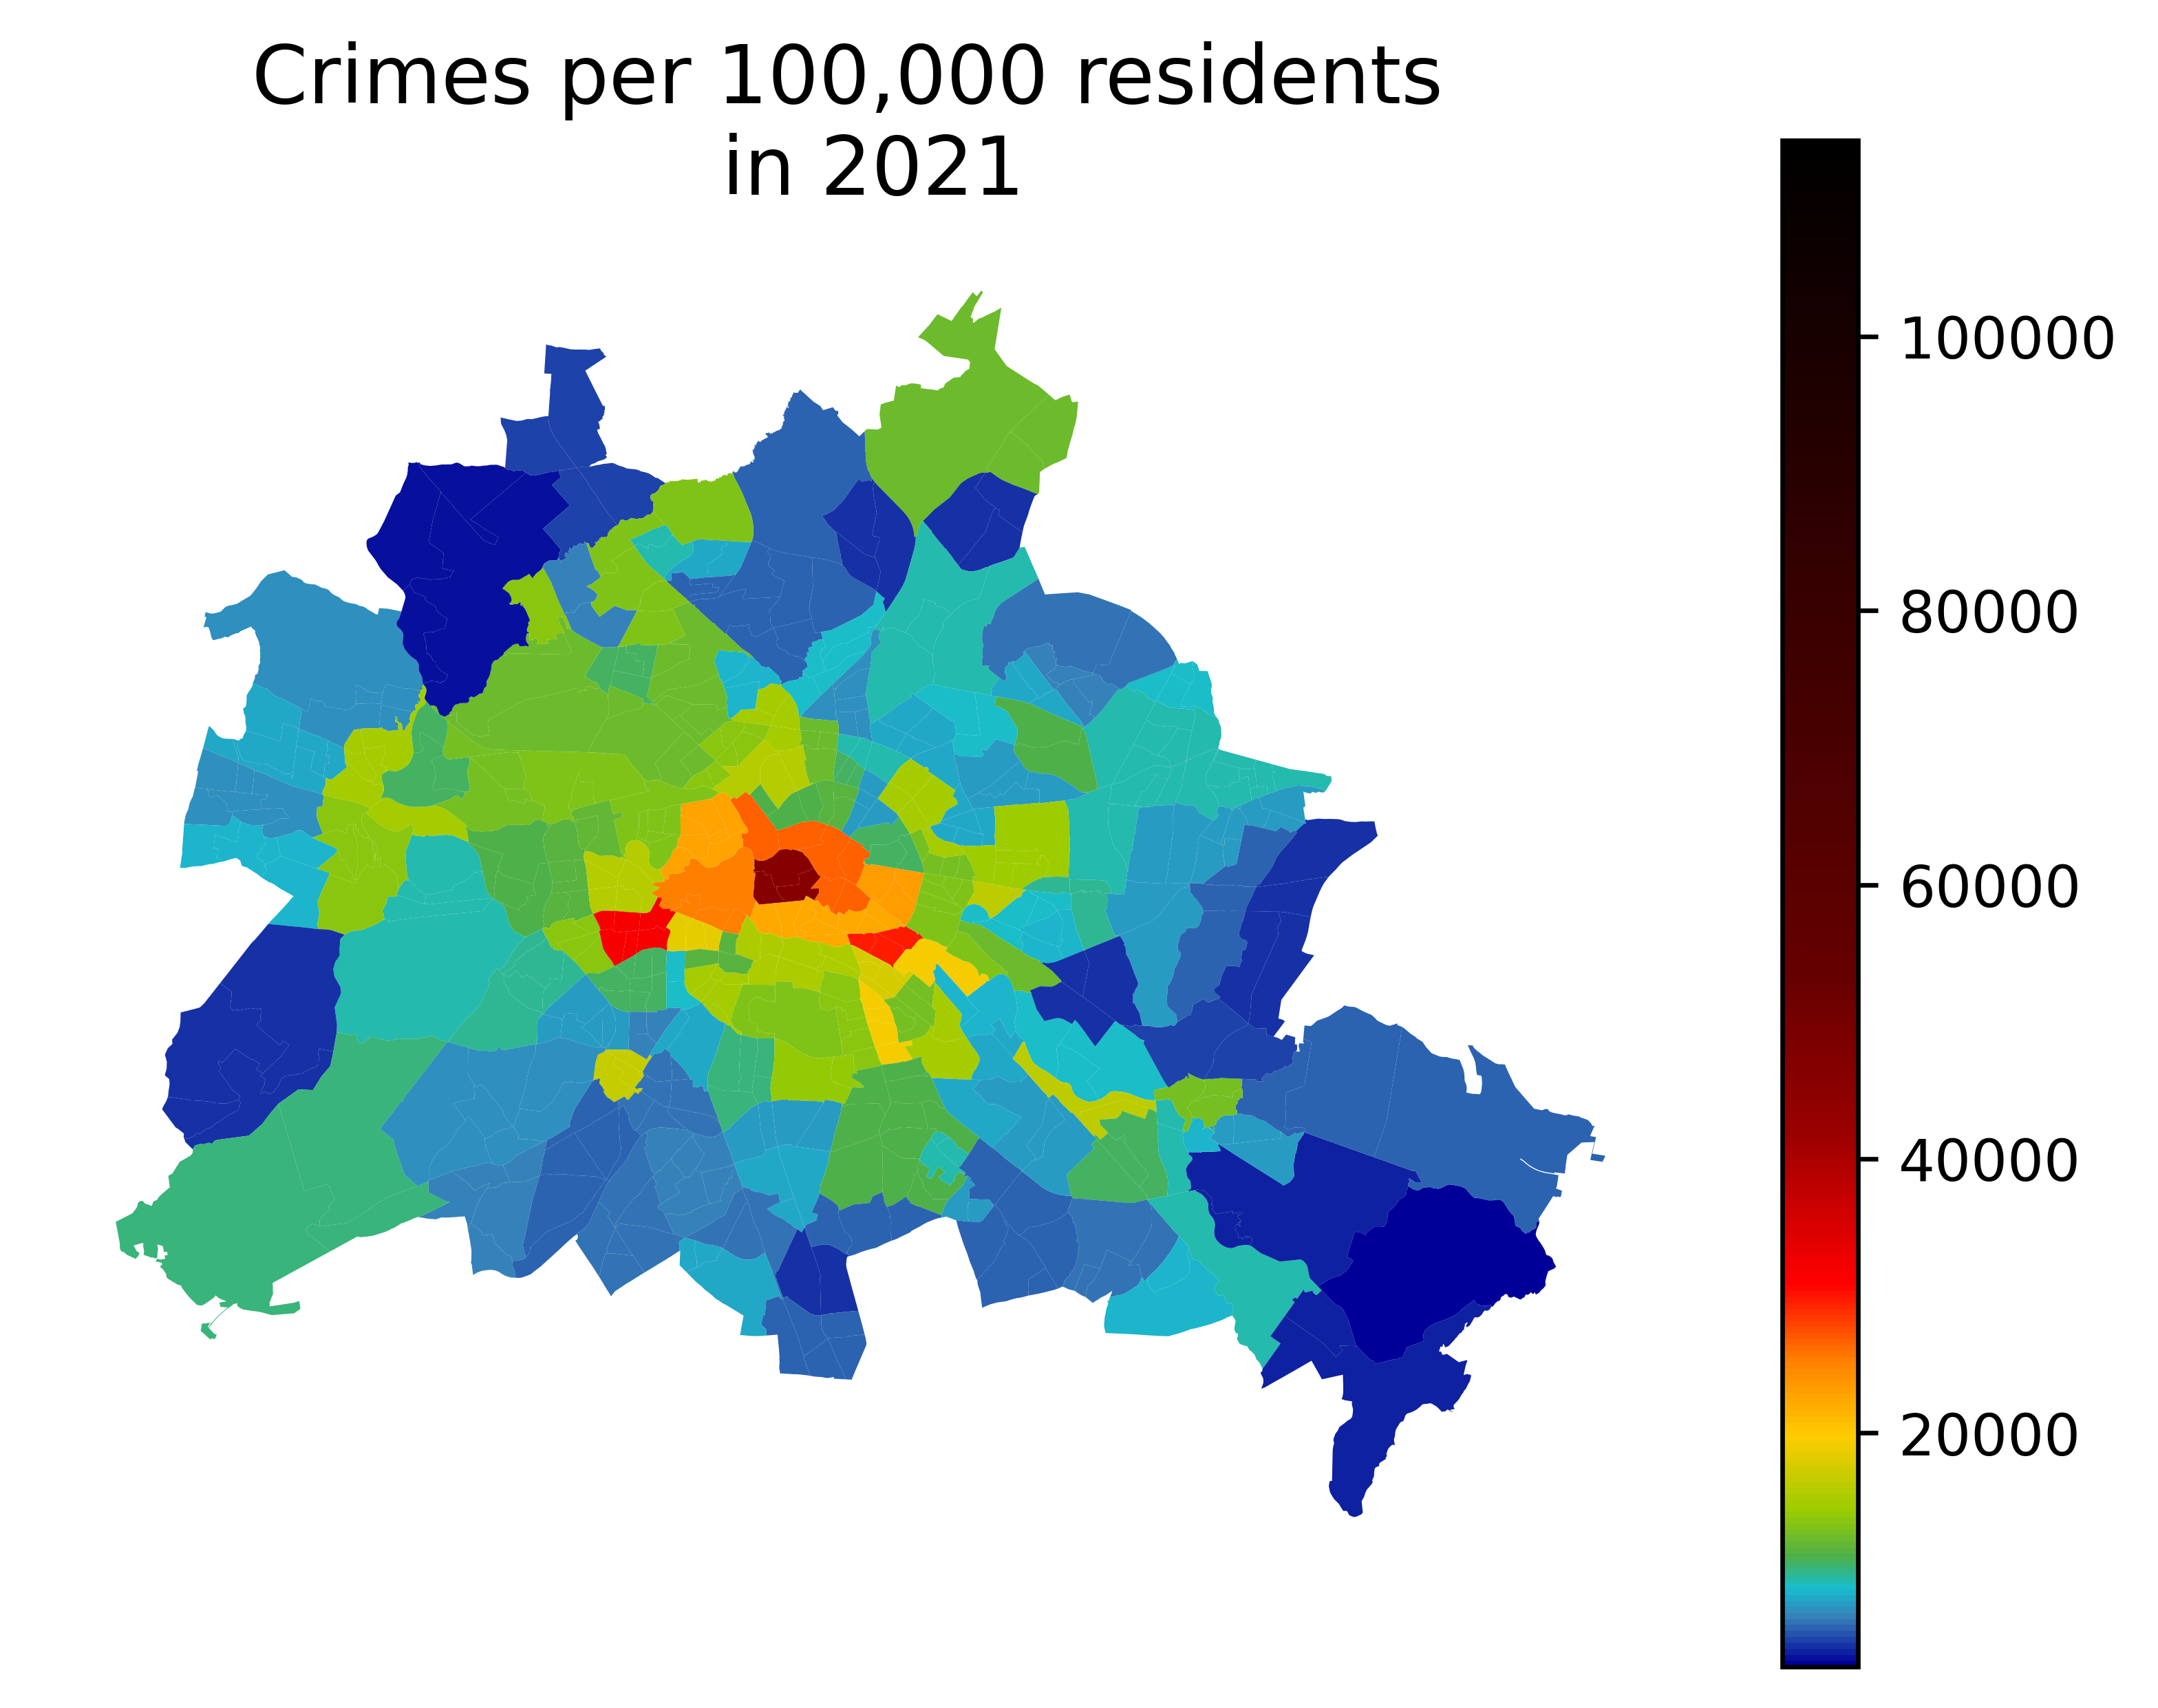

In [1]:
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns
from IPython import display
import time
import warnings

warnings.filterwarnings("ignore")

tab10 = sns.color_palette("tab10")
set1 = sns.color_palette("Set1")
colors = ["#000099", set1[1], tab10[9], set1[2], "#99cc00", "#ffcc00", set1[4], "#ff0000", "#cc0000", "#990000", "#660000", "#000000"]
positions = [0.0, 0.03, 0.05, 0.07, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.45, 1.0]
custom_cmap = mcolors.LinearSegmentedColormap.from_list('custom_colormap', list(zip(positions, colors)))
custom_cmap

crime_dev = pd.read_pickle("../data/05_kriminalitaet_2013_bis_2022_hz.pkl")

crime_dev["Straftaten \n-insgesamt-"] = crime_dev["Straftaten \n-insgesamt-"].astype(int)

max_value = max(crime_dev["Straftaten \n-insgesamt-"])
min_value = min(crime_dev["Straftaten \n-insgesamt-"])
vmin, vmax = min_value, max_value

for year in range(2013, 2023):
    year_df = crime_dev[crime_dev['Year'] == year]
    
    straftaten_gesamt_df = year_df[["PLR_NAME", "geometry", "Straftaten \n-insgesamt-"]]
    straftaten_gesamt_df = straftaten_gesamt_df.rename(columns={"Straftaten \n-insgesamt-": "Crimes per 100.000 residents",
                                                                "PLR_NAME": "Area"})
    straftaten_gesamt_df = gpd.GeoDataFrame(straftaten_gesamt_df, geometry="geometry")
    
    fig, ax = plt.subplots()
    straftaten_gesamt_df.plot(column="Crimes per 100.000 residents", cmap=custom_cmap, legend=True,
                              ax=ax, vmin=vmin, vmax=vmax, edgecolor='None')

    #ax.set_title(f"Crimes per 100,000 residents \nper district in {year}", fontsize=20, color="blue", fontweight="bold")
    ax.set_title(f"Crimes per 100,000 residents \n in {year}", fontsize=14)


    ax.set_axis_off()
    plt.gcf().set_dpi(600)
    
    display.display(plt.gcf())
    display.clear_output(wait=True)

    time.sleep(2)

    plt.close(fig)


In {numref}`fig:crimes-development` we showcase a heatmap similar to the two maps in {numref}`sec:spatial`. It presents the spatial distribution of the number of overall crimes per 100,000 residents per district over the past ten years (2013-2022).

```{figure} plots/heatmap.gif
---
width: 100%
name: fig:crimes-development
---
Number of crimes per 100,000 residents per district in the years 2013–2022.
```
The frequency of overall crime seems to be more concentrated in the center parts of Berlin. This makes us wonder if there might be a general correlation with population density, and indeed, there is a slight correlation shown in {numref}`sec:crimes_burdens_pop` ({numref}`fig:crimes-vs-pop`).

{numref}`fig:crimes-overall` shows just like the map above the number of crimes per 100,000 residents per district in 2013–2022, but the display as a line plot allows for an easier interpretation of development over time.

```{figure} plots/overall_crime.svg
---
width: 100%
name: fig:crimes-overall
---
Number of crimes per 100,000 residents in the years 2013–2022 by district.
```